In [1]:
import pandas as pd
import numpy as np

weat = pd.read_csv('weatherHistory.csv')
weat['Formatted Date'] = pd.to_datetime(weat['Formatted Date'], utc=True)
weat = weat.set_index('Formatted Date')
weat = weat[['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]
weat.info()
weat.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-03-31 22:00:00+00:00 to 2016-09-09 21:00:00+00:00
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Apparent Temperature (C)  96453 non-null  float64
 1   Humidity                  96453 non-null  float64
 2   Wind Speed (km/h)         96453 non-null  float64
dtypes: float64(3)
memory usage: 2.9 MB


,Apparent Temperature (C),Humidity,Wind Speed (km/h)
Formatted Date,,,
2006-03-31 22:00:00+00:00,7.388889,0.89,14.1197
2006-03-31 23:00:00+00:00,7.227778,0.86,14.2646
2006-04-01 00:00:00+00:00,9.377778,0.89,3.9284
2006-04-01 01:00:00+00:00,5.944444,0.83,14.1036
2006-04-01 02:00:00+00:00,6.977778,0.83,11.0446


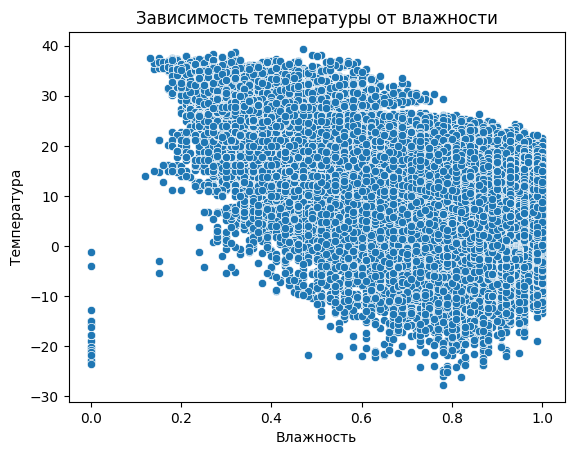

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='Humidity', y='Apparent Temperature (C)', data=weat)
plt.title('Зависимость температуры от влажности')
plt.xlabel('Влажность')
plt.ylabel('Температура')
plt.show()

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(weat['Humidity'], weat['Apparent Temperature (C)'], test_size=0.1, random_state=45 )

In [4]:
x_train

Formatted Date
2013-03-20 12:00:00+00:00    0.56
2015-07-08 18:00:00+00:00    0.67
2013-07-29 20:00:00+00:00    0.64
2013-04-23 12:00:00+00:00    0.39
2008-10-16 04:00:00+00:00    0.87
                             ... 
2007-07-28 05:00:00+00:00    0.52
2012-09-19 22:00:00+00:00    0.80
2006-05-16 11:00:00+00:00    0.41
2013-12-19 10:00:00+00:00    0.92
2006-05-09 05:00:00+00:00    1.00
Name: Humidity, Length: 86807, dtype: float64

In [5]:
y_train

Formatted Date
2013-03-20 12:00:00+00:00    14.855556
2015-07-08 18:00:00+00:00    24.311111
2013-07-29 20:00:00+00:00    26.300000
2013-04-23 12:00:00+00:00    22.022222
2008-10-16 04:00:00+00:00    11.022222
                               ...    
2007-07-28 05:00:00+00:00    22.533333
2012-09-19 22:00:00+00:00    14.883333
2006-05-16 11:00:00+00:00    23.911111
2013-12-19 10:00:00+00:00    -5.333333
2006-05-09 05:00:00+00:00     9.661111
Name: Apparent Temperature (C), Length: 86807, dtype: float64

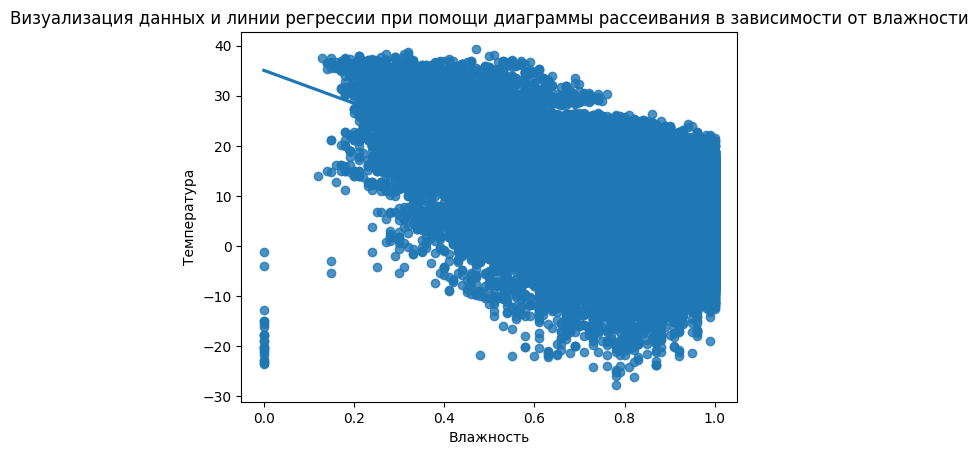

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train.to_frame(), y_train.to_frame())
tp = lr.predict(x_test.to_frame())
sns.scatterplot()
sns.regplot(x=x_train, y=y_train)
plt.title('Визуализация данных и линии регрессии при помощи диаграммы рассеивания в зависимости от влажности')
plt.xlabel('Влажность')
plt.ylabel('Температура')
plt.show()

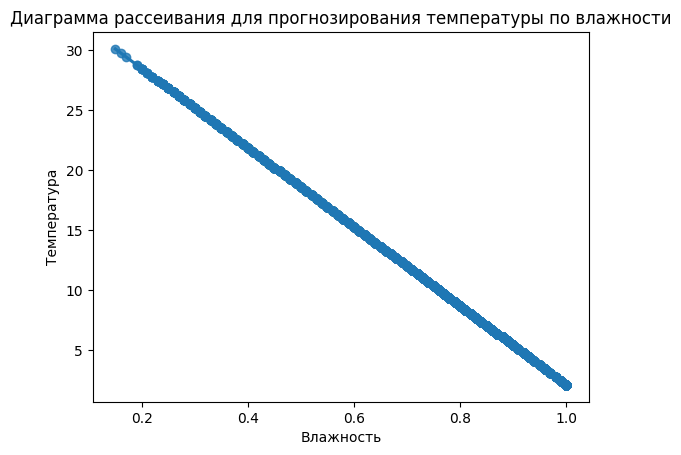

In [7]:
sns.scatterplot()
sns.regplot(x=x_test, y=tp)
plt.title('Диаграмма рассеивания для прогнозирования температуры по влажности')
plt.xlabel('Влажность')
plt.ylabel('Температура')
plt.show()

In [8]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(weat[['Humidity', 'Wind Speed (km/h)']], weat['Apparent Temperature (C)'], test_size=0.1, random_state=45)

In [9]:
x_train

,Humidity,Wind Speed (km/h)
Formatted Date,,
2013-03-20 12:00:00+00:00,0.56,19.1429
2015-07-08 18:00:00+00:00,0.67,12.8317
2013-07-29 20:00:00+00:00,0.64,6.0536
2013-04-23 12:00:00+00:00,0.39,17.1465
2008-10-16 04:00:00+00:00,0.87,7.6475
...,...,...
2007-07-28 05:00:00+00:00,0.52,4.8944
2012-09-19 22:00:00+00:00,0.80,20.3826
2006-05-16 11:00:00+00:00,0.41,13.1054


In [10]:
y_train

Formatted Date
2013-03-20 12:00:00+00:00    14.855556
2015-07-08 18:00:00+00:00    24.311111
2013-07-29 20:00:00+00:00    26.300000
2013-04-23 12:00:00+00:00    22.022222
2008-10-16 04:00:00+00:00    11.022222
                               ...    
2007-07-28 05:00:00+00:00    22.533333
2012-09-19 22:00:00+00:00    14.883333
2006-05-16 11:00:00+00:00    23.911111
2013-12-19 10:00:00+00:00    -5.333333
2006-05-09 05:00:00+00:00     9.661111
Name: Apparent Temperature (C), Length: 86807, dtype: float64

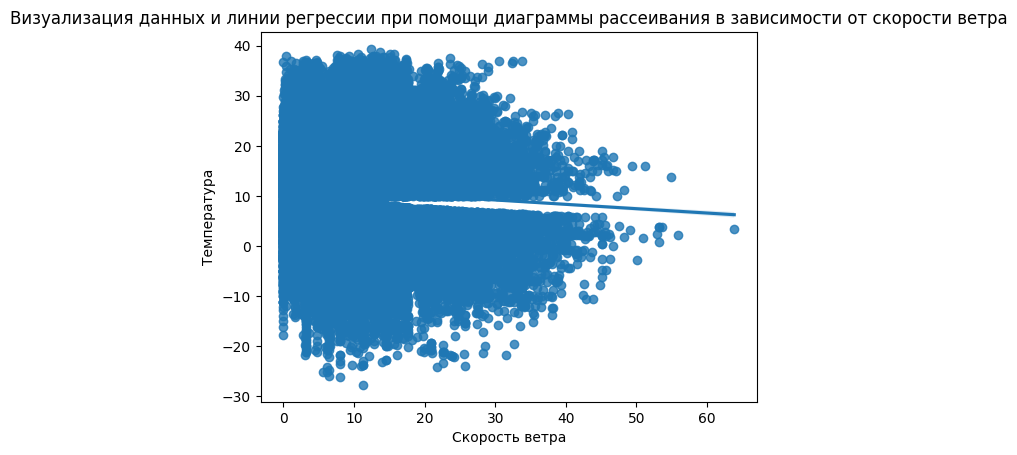

In [11]:
sns.scatterplot()
sns.regplot(x=x_train['Wind Speed (km/h)'], y=y_train)
plt.title('Визуализация данных и линии регрессии при помощи диаграммы рассеивания в зависимости от скорости ветра')
plt.xlabel('Скорость ветра')
plt.ylabel('Температура')
plt.show()

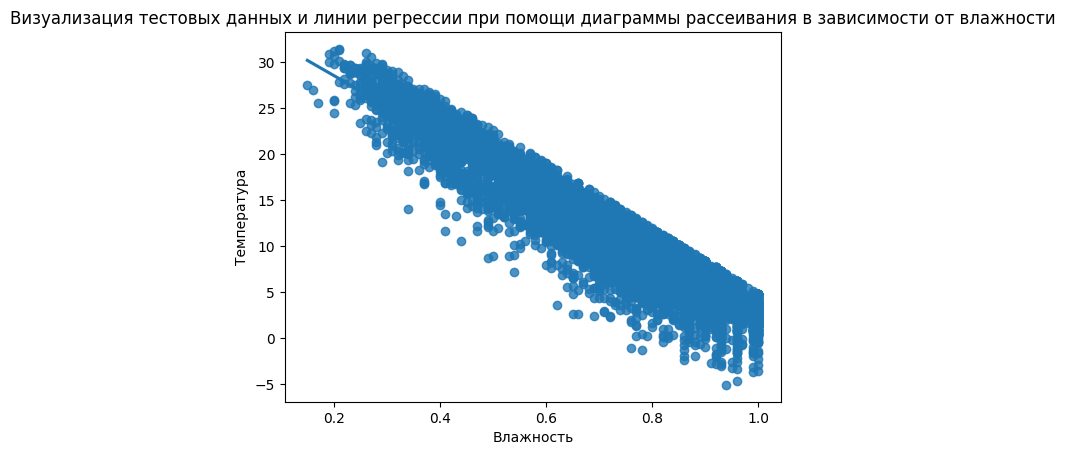

In [12]:
lr.fit(x_train, y_train.to_frame())
tp = lr.predict(x_test)
sns.scatterplot()
sns.regplot(x=x_test['Humidity'], y=tp)
plt.title('Визуализация тестовых данных и линии регрессии при помощи диаграммы рассеивания в зависимости от влажности')
plt.xlabel('Влажность')
plt.ylabel('Температура')
plt.show()

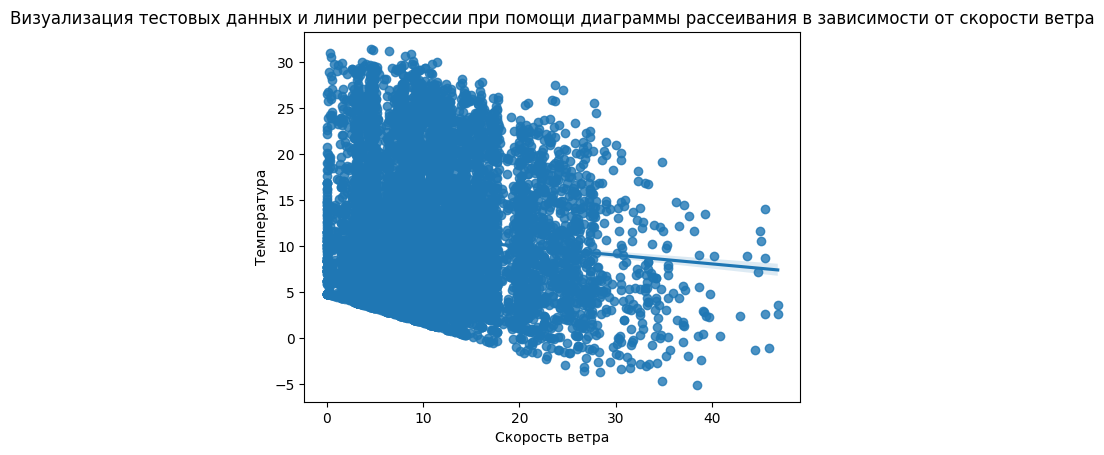

In [13]:
sns.scatterplot()
sns.regplot(x=x_test['Wind Speed (km/h)'], y=tp)
plt.title('Визуализация тестовых данных и линии регрессии при помощи диаграммы рассеивания в зависимости от скорости ветра')
plt.xlabel('Скорость ветра')
plt.ylabel('Температура')
plt.show()

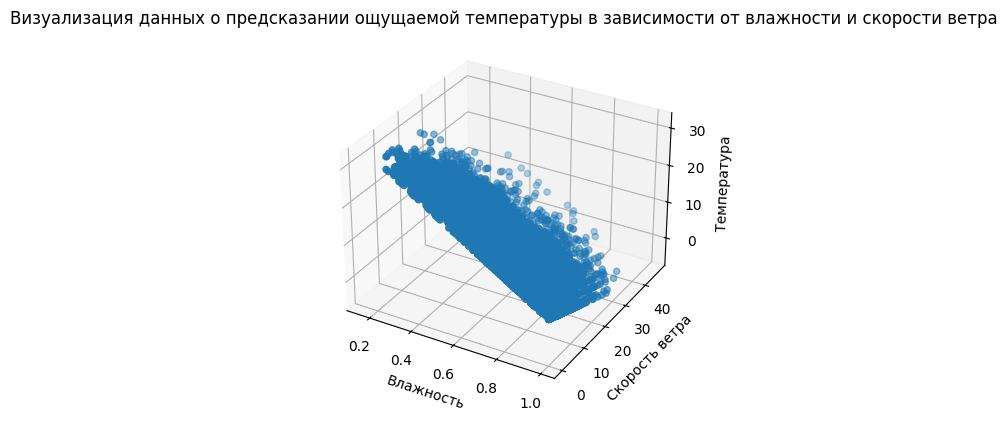

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = x_test['Humidity']
y = x_test['Wind Speed (km/h)']
z = tp
plt.title('Визуализация данных о предсказании ощущаемой температуры в зависимости от влажности и скорости ветра')
ax.scatter(x, y, z)
ax.set_xlabel("Влажность")
ax.set_ylabel("Скорость ветра")
ax.set_zlabel("Температура")
plt.show()